# Analiza sentymentów w recenzjach książek 

### PetrashU, 2023

## Wprowadzenie teoretyczne
Analiza sentymentów to rozpoznanie i ocena wydźwięku emocjonalnego tekstu na podstawie użytych słów, naznaczonych emocjonalnie. Jest używana do klasyfikowania i analizy opinii wobec produktów, wydarzeń, poglądów itp.

Metody używane do analizy sentymentów dzielono na$^{1}$:
1. __Metody słownikowe__ - opierają się na ocenie emocji przekazywanych przez oddzielne tokeny(słowa), na podstawie tego wyliczany jest ogólny nastrój zdania, nastroje zdań zadają nastrój tekstu.
Dla wykorzystania tego typu metod potrzebujemy dostęp do słownika, w którym każdemu słowu jest prypisana emocja wraz z jej intensywnością. Słowniki takie są tworzone przez ludzi, ręcznie oceniających emocjonalny wydźwięk każdego słowa.

__Zalety__ tego typu metod:
* Publicznie udostępniane i często aktualizowane słowniki;
* Nie wymagają implementacji zaawansowanych algorytmów;
* Szybsze w analizie dużych zbiorów danych dzięki stosunkowo małej złożoności.

__Wady__ metod słownikowych:
* Jedno słowo może mieć inne znaczenie w zależności od kontekstu, lecz w słowniku ma przypisany jeden stały sentyment;
* Może wymagać własnoręcznego utworzenia słownika przez człowieka (przy użyciu terminów, nie uwzględnianych w słownikach publicznych), co jest czasochłonne i obarczone blędem człowieka.

__Prykłady__$^{2}$: 
* SentiWordNet;
* SentiWords;
* VADER.

2. __Metody statystyczne__ - wykorzystują założenie, że teksty o tym samym nastroju w kontekscie jednego obszaru tematycznego wykorzystują podobne słownictwo. Systemy typów "uczenie bez nadzoru" albo "uczenie z nadzorem" otrzymują dane przykładowe i wyodrębniają zależności pomiędzy tekstami jednej klasy.

__Zalety__:
* Model może być wytrenowany dla wykrywania sarkazmu lub ironii;
* Utworzenie przez maszynę słownika dopasowanego do konkretnego tematu.

__Wady__:
* Wymagają dużego albo bardzo dokładnego zestawu danych;
* Wyższa podatność na błędy ortograficzne, język specyficzny(slang), punktuację, użycie emotikonów lub linków;
* Większe koszty implementacji i złożoność obliczeniowa.

__Przykłady__$^{3}$:
* Maszyna wektorów nośnych;
* Naiwny klasyfikator bayesowski;
* sieci neuronowe.




$^{1}$_Medhat W., Hassan A., Korashy H. (2014) Sentiment analysis algorithms and applications: A survey, "Ain Shams Engineering Journal" nr 5, str. 1093_

$^{2}$_Elia F. (2020). Sentiment Analysis Dictionaries | Baeldung on Computer Science. \[online\] www.baeldung.com. \[Dostęp 25.03.2023\] Dostępny w: https://www.baeldung.com/cs/sentiment-analysis-dictionaries._

$^{3}$_Yilmaz B. (2022). Sentiment Analysis Methods in 2023: Overview, Pros & Cons. \[online\] research.aimultiple.com. \[Dostęp 25.03.2023\] Dostępny w: https://research.aimultiple.com/sentiment-analysis-methods/#1-lexicon-based-methods [Accessed 28 May 2023]._

## Podstawowe przygotowywanie danych i statystyki



Najważniejszym krokiem jest import potrzebnych bibliotek.

Biblioteka __pandas__ zawiera funkcję wczytywania danych z pliku .csv.

__Matplotlib.pyplot__ jest potrzebna do rysowania wykresów, w danym projekcie do rysowania statystyk wystąpienia recenzji o poszczególnych klasach.

Klasa __Counter__ z modułu __collections__ zapewnia zliczanie elementów w kontenerach.

Z modułu __sklearn.metrics__ użyję funkcji:
- __'accuracy_score'__ do obliczania dokładności klasyfikacji;
- __'classification_report'__ do generowania raportu wyników klasyfikacji;
- __'confusion_matrix'__ do kreacji macierzy błędu.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from seaborn import heatmap

__NLTK__ (the Natural Language Toolkit) jest platformą składająca się z bibliotek i programów służących do symbolicznego i statystycznego przetwarzania języka naturalnego.

W danym projekcie będą używane dostępne na tej platformie:
- Implementacja modelu VADER;
- Lista stop-słów;
- Lematyzator słów.

In [2]:
import nltk

In [3]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

Dane do analizy zostały pobrane z repozytorium https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis .

Różne sbosoby analizy sentymentów mogą wymagać różnego wstępnego przetwarzania danych. Ale są podstawowe edycje, których potrzebują wszystkie modele.
Na obecnym etapie wczytuję dane, zostawiam tylko informacje korzystne dla analizy, ewentualnie usuwam dane niepełne.

In [4]:
#Wczytanie danych
data = pd.read_csv('/kaggle/input/amazon-kindle-book-review-for-sentiment-analysis/all_kindle_review .csv');
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [5]:
#Zostawiam tylko podsumowanie, tekst opinii i ocenę produktu
data = data[['rating','reviewText','summary']]
data.head()

,rating,reviewText,summary
0,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average
1,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!
2,3,I'll start by saying this is the first of four...,Snapdragon Alley
3,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy
4,4,I did not expect this type of book to be in li...,Book


In [6]:
#Sprawdzam czy i ile zestaw zawiera wartości pustych
data.isnull().sum()
# W razie potrzeby można zastosować finkcji dropna()

rating        0
reviewText    0
summary       0
dtype: int64

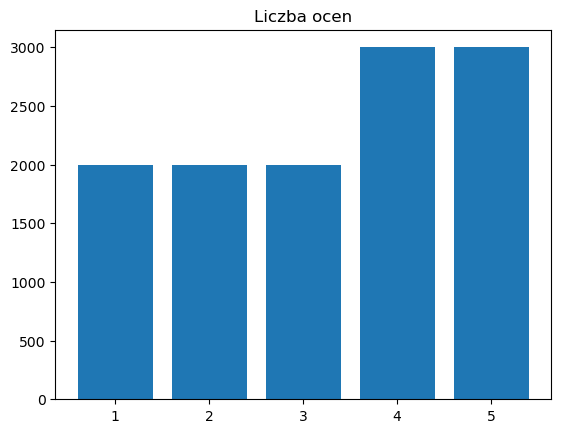

In [8]:
#Sprawdzam ile mam recenzji o każdej ocenie
freqs_1 = Counter(data.rating)
plt.bar(freqs_1.keys(), freqs_1.values())
plt.title('Liczba ocen')
plt.show()

# Metoda słownikowa
## VADER$^{4}$

__VADER__ (Valence Aware Dictionary and sEntiment Reasoner) to narzędzie analizy sentymentów oparte na leksykonie i regułach, które jest specjalnie dostosowane do sentymentów wyrażanych w mediach społecznościowych. Jest w pełni dostępne jako otwarte oprogramowanie na licencji \[MIT License\].$^{4}$

Słownik jest walidowany przez wielu niezależnych sędziów, słownictwo w szczególności jest dostosowane do wykorzystania w mikroblogach.$^{4}$

Vader ocenia nie tylko polarność sentymentu, ale też jego intensywność w skali (-4;4), gdzie -4 oznacza "Bardzo negatywny", 0 - "Neutralny", 4 - "Bardzo pozytywny".

Analiza w tym modelu jest oparta dodatkowo o 5 reguł$^{5}$:
1. __Bierze pod uwagę interpunkcję__, np. zwiększa intensywność przy zastosowaniu wykrzyknika "!".
2. __Uwzględnia wielkie litery__. W szególności słowa, całkiem napisane wielkimi literami, np. "Ten produkt jest SUPER", mają większą intensywność sentymentu.
3. __Zwraca uwagę na przysłówki stopnia__, które mogą zwiększyć albo zmniejszyć intensywność.
4. __Zważa na spójniki przeciwstawne__. Tak przy napotkaniu spójnika "ale" dominującą rolę będzie odgrywać sentyment drugiej połowy zdania.
5. __Szuka negacji__. Analizująć trzy słowa, występujących przed tym mającym sentymentalną wagę, można złapać 90% przypadków negacji, która odwraca polarność tekstu.

Wynik jest obliczany przez sumowanie walencyjności każdego słowa ze słownika i znormalizowanie otrzymanej wartości: -1 jako najbardziej negatywny, +1 jako najbardziej pozytywny.$^{5}$

VADER ma otwarty kod źródłowy dostępny pod adresem https://github.com/cjhutto/vaderSentiment. Jest też zaimplementowany na NLTK w formie, zmodyfikowanej odpowiednio dla zapewnienia compatybilności z Python 3 i uzyskania większej modułowości: https://www.nltk.org/_modules/nltk/sentiment/vader.html .


$^{4}$_Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014._

$^{5}$_Swarnkar, N. (2020). VADER Sentiment Analysis in Algorithmic Trading. \[online\] QuantInsti. \[Dostęp 10.04.2023\] Dostepny w: https://blog.quantinsti.com/vader-sentiment/_


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#Powyźszy import może wyłowywać ostrzeżenie "The twython library has not been installed. Some functionality from the twitter package will not be available.". 
#Nie będę potrzebowała pakietu twitter, więc nie jest to dla mnie ważne.

analyzer = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Jako że przy ocenach od 1 do 5 różnica pomiędzy sąsiednimi klasami nie jest zazwyczaj tak wyróżnialna, modele będą mieć duży problem z dokładną klasyfikacją. Dlatego zamienię tę skalę na dwie inne:
- opinie negatywne(oceny 1 i 2), neutralne(ocena 3) i pozytywne(oceny 4 i 5);
- opinie negatywne(oceny 1, 2, 3) i pozytywne(oceny 4 i 5).

In [8]:
reviews = data['reviewText'].values
summaries = data['summary'].values
labels = data['rating'].values
labels_vader_2 = ['positive' if 3<label<=5 else 'negative' for label in labels]
labels_vader_3 = ['positive' if 4<=label<=5 else 'neutral' if label == 3 else 'negative' for label in labels]

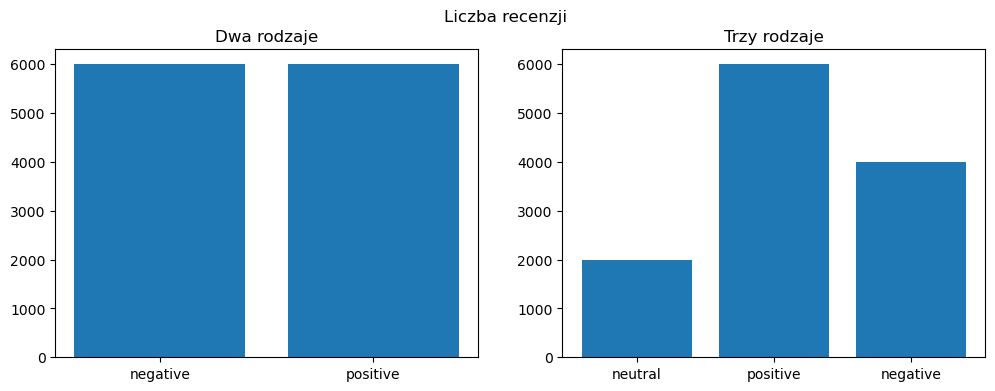

In [9]:
freqs = Counter(labels_vader_2)
freqs_1 = Counter(labels_vader_3)

fig = plt.figure(figsize = (12,4))
fig.suptitle("Liczba recenzji")

plt.subplot(1,2,1)
plt.bar(freqs.keys(), freqs.values())
plt.title("Dwa rodzaje")

plt.subplot(1,2,2)
plt.bar(freqs_1.keys(), freqs_1.values())
plt.title("Trzy rodzaje")

plt.show()

In [10]:
#Przykład wyniku analizy tekstu za pomocą VADER

print("To wynik analizy dobrej opinii:")
print(analyzer.polarity_scores("It's a great product!! I loved it!!!"))

print("To wynik analizy neutralnej opinii:")
print(analyzer.polarity_scores("Product is ok. Matched my expectations"))

print("To wynik analizy negatywnej opinii:")
print(analyzer.polarity_scores("This product is awfull!! I hated it!!!"))

To wynik analizy dobrej opinii:
{'neg': 0.0, 'neu': 0.247, 'pos': 0.753, 'compound': 0.8798}
To wynik analizy neutralnej opinii:
{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.296}
To wynik analizy negatywnej opinii:
{'neg': 0.518, 'neu': 0.482, 'pos': 0.0, 'compound': -0.7482}


Wynikiem zastosowania modelu otrzymujemy statystyki:
- 'neg' - negatywny sentyment w tekscie, wartość od 0 do 1;
- 'neu' - neutralny sentyment w tekscie, wartość od 0 do 1;
- 'pos' - pozytywny sentyment w tekscie, wartość od 0 do 1;
- 'compound' - znormalizowany ogólny wskaźnik sentymentu, wartośc od -1 do 1.

Następujące funkcje służą do przetłumaczenia tego wyniku na moje klasy.

In [11]:
def format_out_2(out):
    rate = 'negative'
    if (out['compound'] >= 0):
        rate = "positive"
    return rate
def format_out_3(out):
    rate = "neutral"
    if (out['compound'] >= 0.3):
        rate = "positive"
    elif (out['compound'] <= -0.3):
        rate = "negative"
    return rate

### Klasyfikacja przy podziale na dwie klasy

In [12]:
#Zastosowanie VADER na tekstach recenzji
output_vader_2 = []
for review in reviews:
    output_vader_2.append(format_out_2(analyzer.polarity_scores(review)))

In [13]:
#Zastosowanie VADER na podsumowaniach
out_summary_vader_2 = []
for summary in summaries:
    out_summary_vader_2.append(format_out_2(analyzer.polarity_scores(summary)))

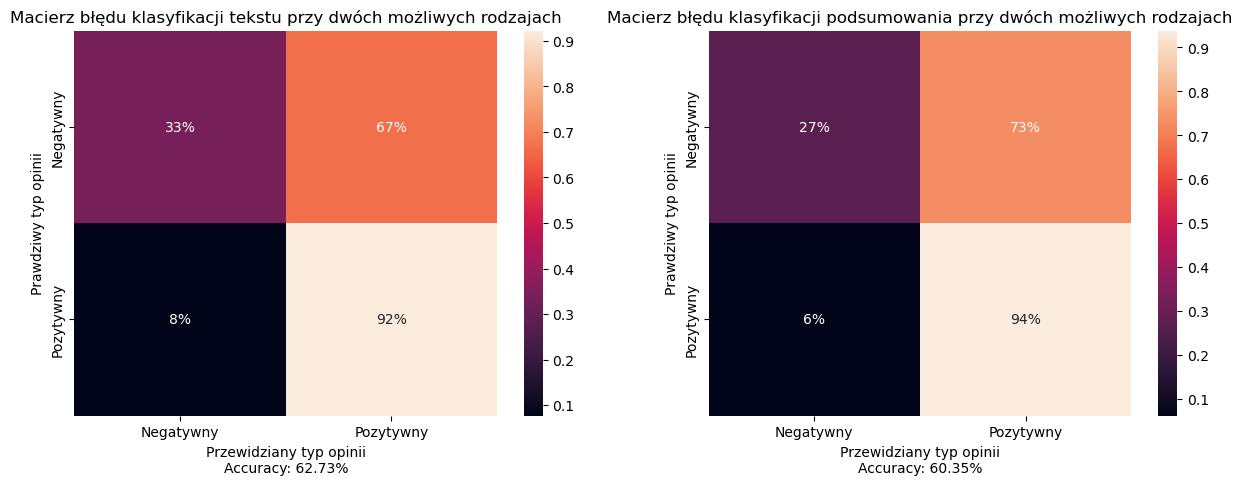

In [14]:
import seaborn as sns
plt.figure(figsize = (15,5))
lab_names_2 = ["Negatywny","Pozytywny"]

plt.subplot(1,2,1)
confusion_matrix_2 = confusion_matrix(labels_vader_2,output_vader_2, normalize = "true")
display_2 = heatmap(confusion_matrix_2, annot=True, fmt=".0%", xticklabels=lab_names_2, yticklabels=lab_names_2)
display_2.plot()
display_2.set(
                title='Macierz błędu klasyfikacji tekstu przy dwóch możliwych rodzajach', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_vader_2,output_vader_2)), 
                ylabel='Prawdziwy typ opinii')

plt.subplot(1,2,2)
summ_confusion_matrix_2 = confusion_matrix(labels_vader_2,out_summary_vader_2, normalize = "true",)
display_2_sum = heatmap(summ_confusion_matrix_2, annot=True, fmt=".0%", xticklabels=lab_names_2, yticklabels=lab_names_2)
display_2_sum.plot()
display_2_sum.set(
                title='Macierz błędu klasyfikacji podsumowania przy dwóch możliwych rodzajach', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_vader_2,out_summary_vader_2)),
                ylabel='Prawdziwy typ opinii')

plt.show()

### Wynik
Dokładność przewidywania sentymentu za pomocą VADERa po tekscie opinii wynośi około 63%, po podsumowaniu - 60%. Najgorzej radzi sobie z klasyfikowaniem opinii negatywnych wraz z neutralnymi. W następnej części zbadam, jak model zachowa się przy podziale na trzy klasy. 

### Klasyfikacja przy podziale na trzy klasy

In [15]:
#Zastosowanie VADER na tekstach recenzji
output_vader_3 = []
for review in reviews:
    output_vader_3.append(format_out_3(analyzer.polarity_scores(review)))

In [16]:
#Zastosowanie VADER na podsumowaniach
out_summary_vader_3 = []
for summary in summaries:
    out_summary_vader_3.append(format_out_3(analyzer.polarity_scores(summary)))

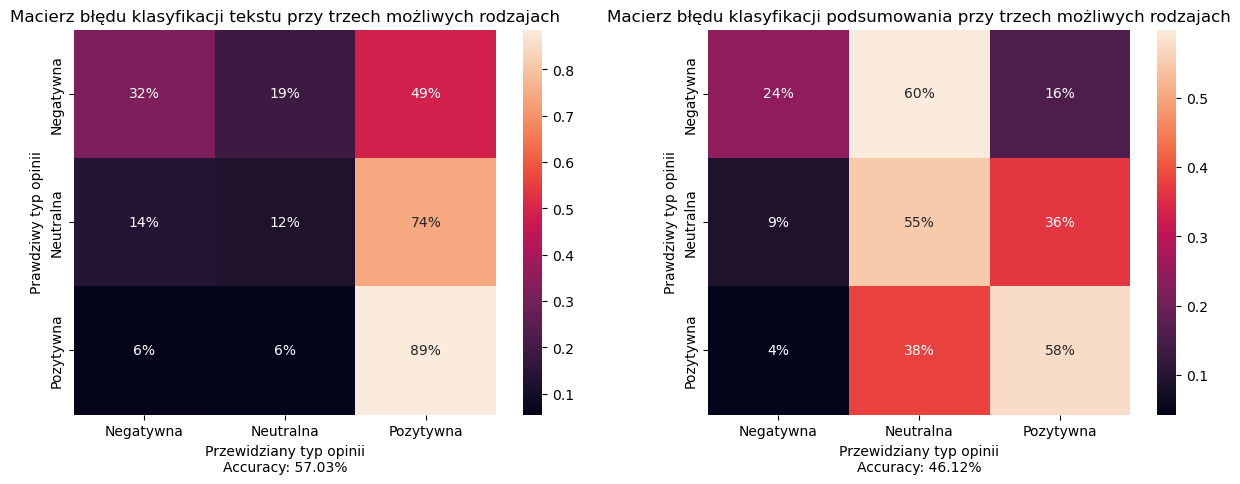

In [17]:
plt.figure(figsize = (15,5))
lab_names_3 = ['Negatywna','Neutralna','Pozytywna']

plt.subplot(1,2,1)
confusion_matrix_3 = confusion_matrix(labels_vader_3,output_vader_3, normalize = "true")
display_3 = heatmap(confusion_matrix_3, annot=True, fmt=".0%", xticklabels=lab_names_3, yticklabels=lab_names_3)
display_3.plot()
display_3.set(
                title='Macierz błędu klasyfikacji tekstu przy trzech możliwych rodzajach', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_vader_3,output_vader_3)), 
                ylabel='Prawdziwy typ opinii')

plt.subplot(1,2,2)
summ_confusion_matrix_3 = confusion_matrix(labels_vader_3,out_summary_vader_3, normalize = "true",)
display_3_sum = heatmap(summ_confusion_matrix_3, annot=True, fmt=".0%", xticklabels=lab_names_3, yticklabels=lab_names_3)
display_3_sum.plot()
display_3_sum.set(
                title='Macierz błędu klasyfikacji podsumowania przy trzech możliwych rodzajach', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_vader_3,out_summary_vader_3)),
                ylabel='Prawdziwy typ opinii')

plt.show()

### Wynik
Przy grupowaniu opinii w trzy klasy, dokładność klasyfikowania się zmniejszyła w przypadku analizy tekstu do poziomu 57%, w przypadku analizy po nagłówku do 46%. 

W klasyfikowaniu po tekscie opinii model znowu najlepiej zareprezentował się w przypadku opinii pozytywnych. Prawie połowę opinii negatywnych i 75% opinii neutralnych odniósł do pozytywnych. 
Takie zachowanie, moim zdaniem, może być wytłumaczone dużą liczbą słów o sentymencie neutralnym lub pozytywnym, użytych przy opisie streszczenia książki, a nie opinii o niej. Oprócz tego, często ludzie mają tendencję do nieużywania bardzo negatywnych słów nawet przy pozostawieniu niskiej oceny.

Pozostałe opinie negatywne były bardziej klasyfikowane jako takie, niż jako neutralne: 34% przeciw 19%. Neutralne lecz są klasyfikowane jako neutralne prawie w tej samej ilości co jako negatywne: około 13%. 

Przy analizowaniu nagłówków opinii, model poprawnie sklasyfikował 55-58% opinii neutralnych jako że i pozytywnych. Opinie negatywne były częściej odnoszone do neutralnych: w 60% przypadków. Poza tym do 36% opinii neutralnych zostało przypisano klasę pozytywną, 38% opinii pozytywnych - neutralną, czyli model miał problem z odróżnieniem jednej od drugiej.

W celach eksperymentu spróbuję tez usunąć opinie neutralne i zobaczyć, jak model sprawdzi się w odróżnieniu negatywu od pozytywu.

In [18]:
reviews_pos_neg = [reviews[i] for i in range(len(reviews)) if labels[i] != 3]
summaries_pos_neg = [summaries[i] for i in range(len(summaries)) if labels[i] != 3]
labels_pos_neg = [label for label in labels if label != 3]
labels_pos_neg = ['positive' if 4<=label<=5 else 'negative' for label in labels_pos_neg]

In [19]:
out_pos_neg_vader_2 = []
for review in reviews_pos_neg:
    out_pos_neg_vader_2.append(format_out_2(analyzer.polarity_scores(review)))

In [20]:
out_pos_neg_summary_vader_2 = []
for summary in summaries_pos_neg:
    out_pos_neg_summary_vader_2.append(format_out_2(analyzer.polarity_scores(summary)))

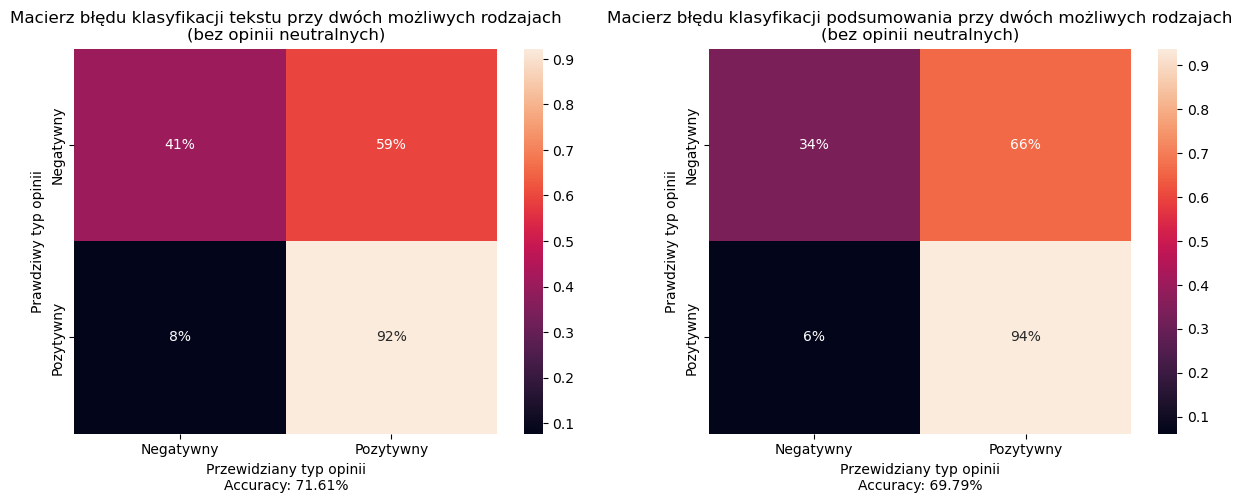

In [21]:
plt.figure(figsize = (15,5))
lab_names_2 = ["Negatywny","Pozytywny"]

plt.subplot(1,2,1)
confusion_matrix_2 = confusion_matrix(labels_pos_neg,out_pos_neg_vader_2, normalize = "true")
display_2 = heatmap(confusion_matrix_2, annot=True, fmt=".0%", xticklabels=lab_names_2, yticklabels=lab_names_2)
display_2.plot()
display_2.set(
                title='Macierz błędu klasyfikacji tekstu przy dwóch możliwych rodzajach\n(bez opinii neutralnych)', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_pos_neg,out_pos_neg_vader_2)), 
                ylabel='Prawdziwy typ opinii')

plt.subplot(1,2,2)
summ_confusion_matrix_2 = confusion_matrix(labels_pos_neg,out_pos_neg_summary_vader_2, normalize = "true",)
display_2_sum = heatmap(summ_confusion_matrix_2, annot=True, fmt=".0%", xticklabels=lab_names_2, yticklabels=lab_names_2)
display_2_sum.plot()
display_2_sum.set(
                title='Macierz błędu klasyfikacji podsumowania przy dwóch możliwych rodzajach\n(bez opinii neutralnych)', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_pos_neg,out_pos_neg_summary_vader_2)),
                ylabel='Prawdziwy typ opinii')

plt.show()

### Wynik

Dokładność przewidywania opinii pozytywnych się nie zmieniła, ale wzrosła w przypadku opinii negatywnych. W klasyfikowaniu po tekscie przypisywanie opinii do negatywnej wzrosło z 33% do 41%, dla nagłówków - z 27% do 34%. Ale w obu przypadkach większość wciąż jest klasyfikowana jako opinie pozytywne.

Spróbuję zmienić próg statystyki, przy którym opinia jest klasyfikowana jako negatywna, i zobaczę, jak zmieni się dokładność.

In [22]:
def format_out_2_flex(out,k):
    rate = 'negative'
    if (out['compound'] >= k):
        rate = "positive"
    return rate

In [23]:
out_vader_2_03 = []
out_vader_2_04 = []
out_vader_2_05 = []
out_vader_2_06 = []
out_vader_2_07 = []
out_vader_2_08 = []
for review in reviews_pos_neg:
    out_vader_2_03.append(format_out_2_flex(analyzer.polarity_scores(review),0.3))
    out_vader_2_04.append(format_out_2_flex(analyzer.polarity_scores(review),0.4))
    out_vader_2_05.append(format_out_2_flex(analyzer.polarity_scores(review),0.5))
    out_vader_2_06.append(format_out_2_flex(analyzer.polarity_scores(review),0.6))
    out_vader_2_07.append(format_out_2_flex(analyzer.polarity_scores(review),0.7))
    out_vader_2_08.append(format_out_2_flex(analyzer.polarity_scores(review),0.8))

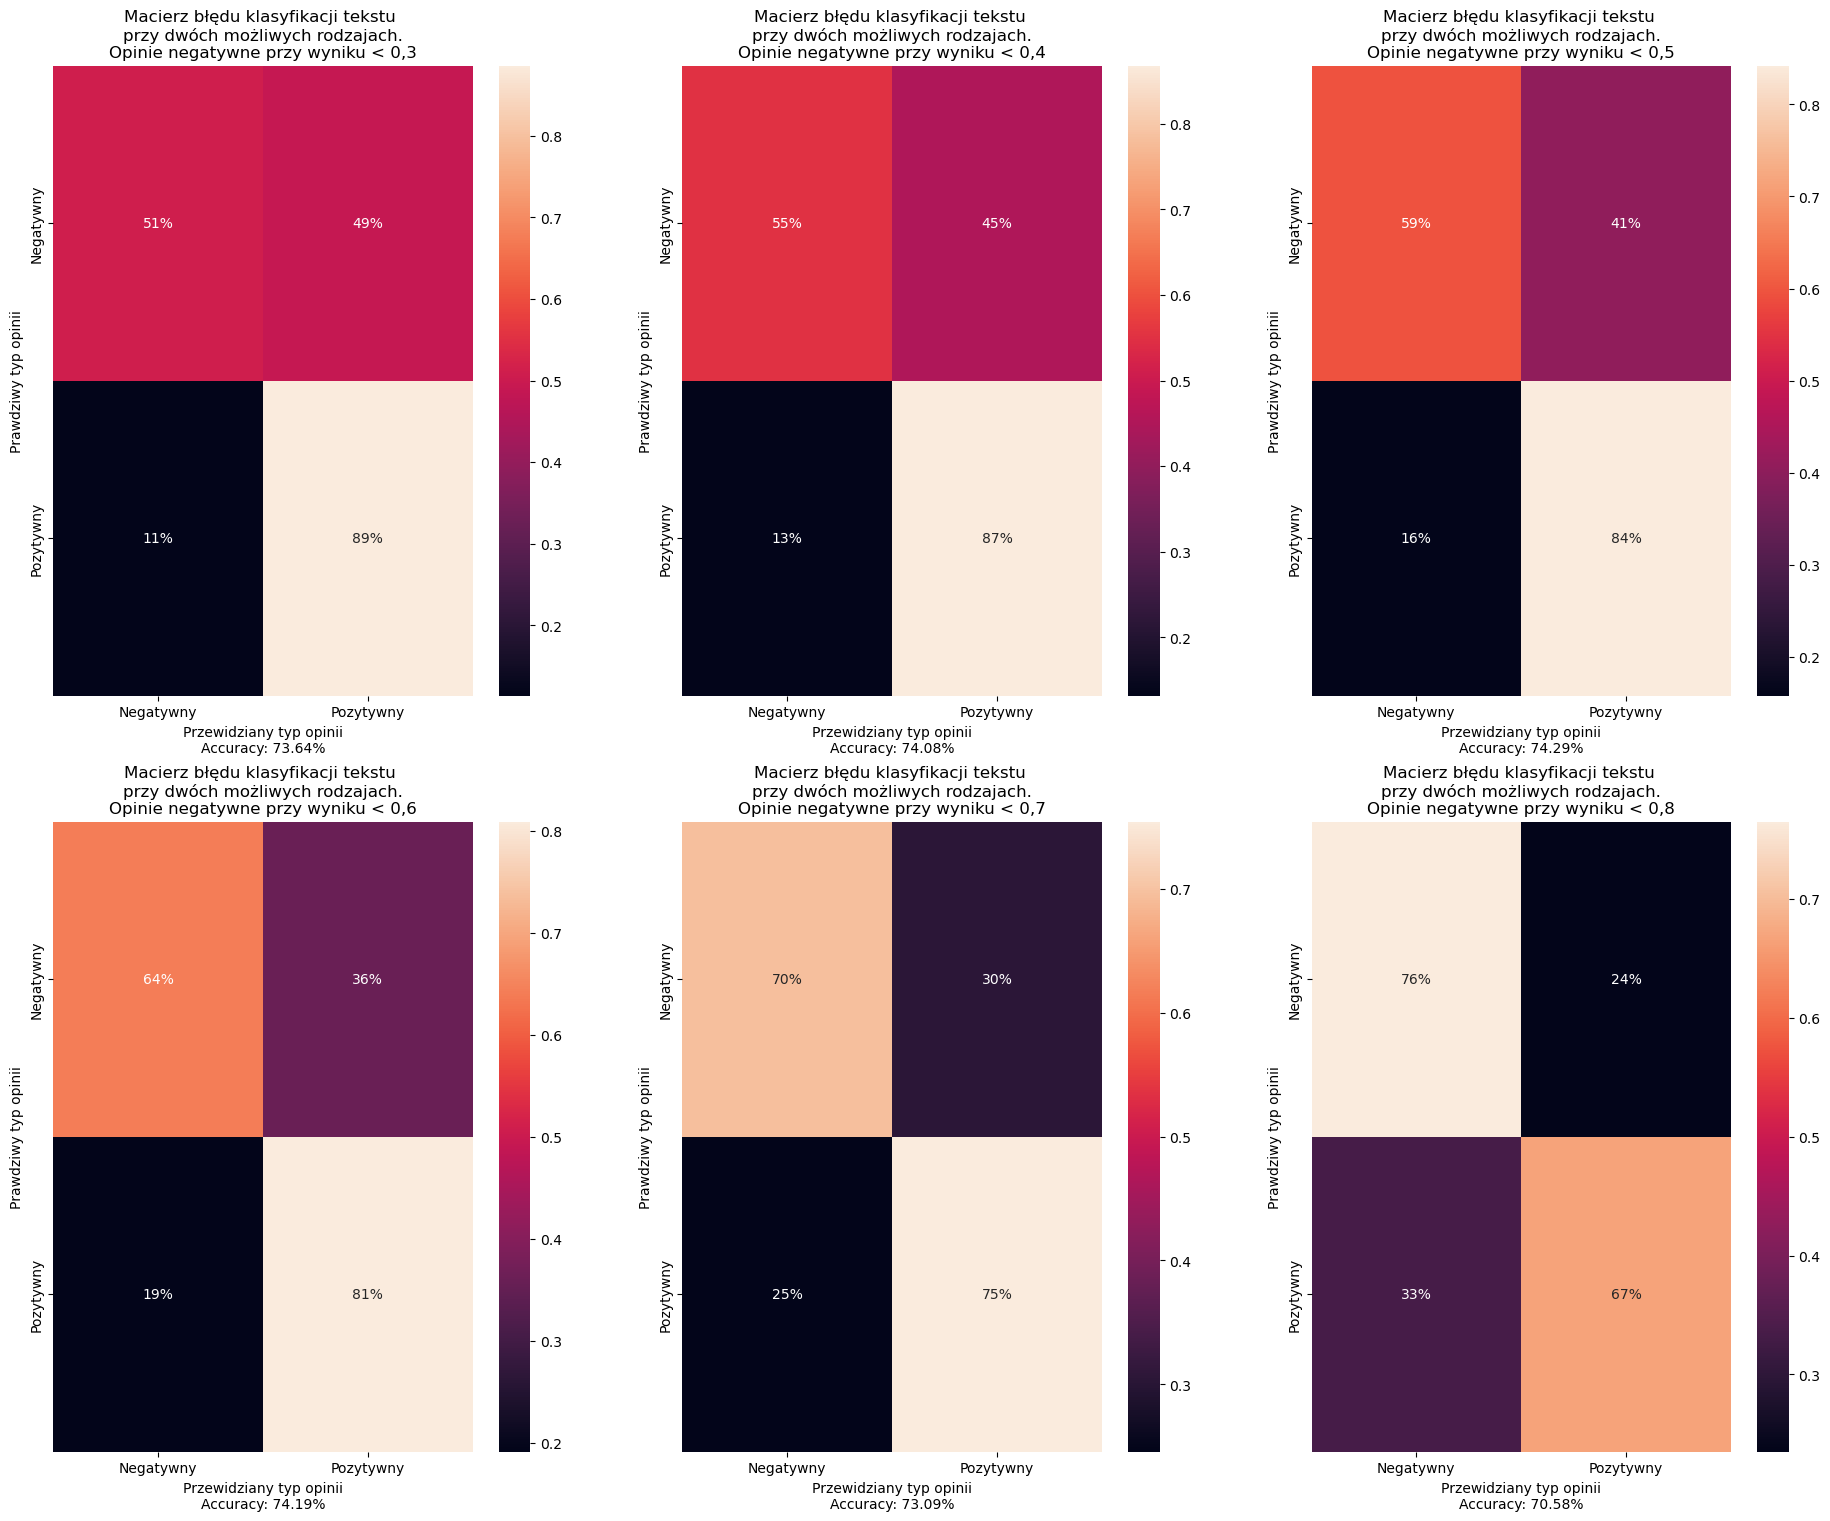

In [24]:
plt.figure(figsize = (23,18))
lab_names_2 = ["Negatywny","Pozytywny"]

plt.subplot(2,3,1)
confusion_matrix_2 = confusion_matrix(labels_pos_neg,out_vader_2_03, normalize = "true")
display_2 = heatmap(confusion_matrix_2, annot=True, fmt=".0%", xticklabels=lab_names_2, yticklabels=lab_names_2)
display_2.plot()
display_2.set(
                title='Macierz błędu klasyfikacji tekstu \nprzy dwóch możliwych rodzajach.\nOpinie negatywne przy wyniku < 0,3', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_pos_neg,out_vader_2_03)), 
                ylabel='Prawdziwy typ opinii')

plt.subplot(2,3,2)
summ_confusion_matrix_2 = confusion_matrix(labels_pos_neg,out_vader_2_04, normalize = "true",)
display_2_sum = heatmap(summ_confusion_matrix_2, annot=True, fmt=".0%", xticklabels=lab_names_2, yticklabels=lab_names_2)
display_2_sum.plot()
display_2_sum.set(
                title='Macierz błędu klasyfikacji tekstu \nprzy dwóch możliwych rodzajach.\nOpinie negatywne przy wyniku < 0,4', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_pos_neg,out_vader_2_04)),
                ylabel='Prawdziwy typ opinii')

plt.subplot(2,3,3)
summ_confusion_matrix_2 = confusion_matrix(labels_pos_neg,out_vader_2_05, normalize = "true",)
display_2_sum = heatmap(summ_confusion_matrix_2, annot=True, fmt=".0%", xticklabels=lab_names_2, yticklabels=lab_names_2)
display_2_sum.plot()
display_2_sum.set(
                title='Macierz błędu klasyfikacji tekstu \nprzy dwóch możliwych rodzajach.\nOpinie negatywne przy wyniku < 0,5', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_pos_neg,out_vader_2_05)),
                ylabel='Prawdziwy typ opinii')
plt.subplot(2,3,4)
summ_confusion_matrix_2 = confusion_matrix(labels_pos_neg,out_vader_2_06, normalize = "true",)
display_2_sum = heatmap(summ_confusion_matrix_2, annot=True, fmt=".0%", xticklabels=lab_names_2, yticklabels=lab_names_2)
display_2_sum.plot()
display_2_sum.set(
                title='Macierz błędu klasyfikacji tekstu \nprzy dwóch możliwych rodzajach.\nOpinie negatywne przy wyniku < 0,6', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_pos_neg,out_vader_2_06)),
                ylabel='Prawdziwy typ opinii')
plt.subplot(2,3,5)
summ_confusion_matrix_2 = confusion_matrix(labels_pos_neg,out_vader_2_07, normalize = "true",)
display_2_sum = heatmap(summ_confusion_matrix_2, annot=True, fmt=".0%", xticklabels=lab_names_2, yticklabels=lab_names_2)
display_2_sum.plot()
display_2_sum.set(
                title='Macierz błędu klasyfikacji tekstu \nprzy dwóch możliwych rodzajach.\nOpinie negatywne przy wyniku < 0,7', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_pos_neg,out_vader_2_07)),
                ylabel='Prawdziwy typ opinii')
plt.subplot(2,3,6)
summ_confusion_matrix_2 = confusion_matrix(labels_pos_neg,out_vader_2_08, normalize = "true",)
display_2_sum = heatmap(summ_confusion_matrix_2, annot=True, fmt=".0%", xticklabels=lab_names_2, yticklabels=lab_names_2)
display_2_sum.plot()
display_2_sum.set(
                title='Macierz błędu klasyfikacji tekstu \nprzy dwóch możliwych rodzajach.\nOpinie negatywne przy wyniku < 0,8', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_pos_neg,out_vader_2_08)),
                ylabel='Prawdziwy typ opinii')

plt.show()

### Wynik:
Widać, że przy zwiekszaniu progu opinii pozytywnych, rośnie dokładność klasyfikowania sentymentu negatywnego, ale maleje pozytywnego. Ogólna dokładność przewidywania rośnie, a po osiągnięciu poziomu 74% zaczyna maleć. 

__Ostatecznie, w moim przypadku VADER maksymalnie może osiągnąć dokładności 74%. Związane jest to głównie z niedopasowaniem modelu do konkretnego stylu opinii, tylko działaniu na podstawie na sztywno przypisanych do słów sentymentów.__

# Metody statystyczne

W związku z tym, że metody te polegają na uczeniu, będzie potrzebna funkcja do dzielenia danych na zbiór uczący i testowy.

In [25]:
from sklearn.model_selection import train_test_split

## Naiwny klasyfikator bayesowski

Materiały źródłowe:

Wikipedia. (2021). Naiwny klasyfikator bayesowski. \[online\] [Dostęp 06.05.2023] Dostępny w: https://pl.wikipedia.org/wiki/Naiwny_klasyfikator_bayesowski.

De, A. (2021). A Hitchhiker’s Guide to Sentiment Analysis using Naive-Bayes Classifier. [online] [Dostęp 06.05.2023] Dostępny w: https://towardsdatascience.com/a-hitchhikers-guide-to-sentiment-analysis-using-naive-bayes-classifier-b921c0fb694 .

www.statsoft.com.pl. (bez daty). Internetowy Podręcznik Statystyki. [online] [Dostęp 13.05.2023] Dostępny w: http://www.statsoft.com.pl/textbook/stathome_stat.html?http%3A%2F%2Fwww.statsoft.com.pl%2Ftextbook%2Fstnaiveb.html .

Jak już wspomniano we wprowadzeniu teoretycznym, metoda statystyczna opiera się na "uczeniu z nadzorem/nauczycielem" lub "uczeniu bez nadzoru/nauczyciela". 

Uczenie z nadzorem polega na dostarczeniu modelu danych przykładowych wraz z odpowidającymi im klasami. Zadaniem modelu jest znaleźienie relacji i zależności pomiędzy danymi i przypisanymi klasami i poprawne klasyfikowanie nowych danych zgodnie ze sformułowanymi regułami.

Czyli do uczenia z nadzorem potrzebujemy metodę klasyfikacji. W tej pracy zastosowałam naiwny klasyfikator Bayesa.

Naiwny klasyfikator bayesowski opiera się na twierdzeniu Bayesa:

$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$

W danym równananiu składniki oznaczają:
- P(A|B) - prawdopodobieństwo zdarzenia A, jęzeli zaszło zdarzenie B
- P(B|A) - prawdopodobieństwo zdarzenia B, jęzeli zaszło zdarzenie A
- P(A) - prawdopodobieństwo zdarzenia A
- P(B) - prawdopodobieństwo zdarzenia B

Prawdopodobieństwa P(A|B) i P(B|A) nazywa się uwarunkowanymi, P(A) i P(B) - prawdopodobieńsywami wstępnymi (a priori).

Klasyfikowanie polega na znalezieniu prawdopodobieństwa wystąpienia zdarzenia "Przynależność do klasy c" przy wystąpieniu zmiennych niezależnych $b_{1}, b_{2},...,b_{n}$, czyli $P(c|b_{1}, b_{2},...,b_{n}$). Prawdopodobieństwa muszą być obliczone dla wszystkich możliwych klas ze zbioru klas C. Największe prawdopodobieństwo określa klasę obiektu:

$\hat{c} = argmax P(c|b_{1}, b_{2},...,b_{n}),$ gdzie $c\in C $

Klasyfikator jest oparty na założeniu o wzajemniej niezależności zmiennych niezależnych (nazywanych predyktorami), które nie zawsze jest poprawne, zgodne z rzeczywistością. Dzięki robieniu tego założenia bez sprawdzenia jego prawdziwości klasyfikator otrzymał nazwę naiwnego.

W danym projekcie wyliczane będą prawdopodobieństwa przynależności tekstu do klasy pozytywnej i negatywnej, chociaż funkcja została napisana w ten sposób, aby klasyfikować na podstawie zestawu klas podanych przez użytkownika, bez ograniczenia ich liczbę.

Dla każdej klasy c liczymy prawdopodobieństwo zgodnie z równaniem

$P(c|t)=\frac{P(t|c)P(c)}{P(t)}$, gdzie t jest podanym tekstem.

Jako że podczas obliczania tekst się nie zmienia, wartość P(t) zawsze będzie taka sama i przy porównaniu nie biędzie odgrywała roli, więc może być pominięta.

$P(c|t)={P(t|c)*P(c)}$

Tekst można podzielić na zbiór cech, czyli słów $w_{1},w_{2},...,w_{n}$.

$P(c|w_{1},w_{2},...,w_{n})=P(w_{1},w_{2},...,w_{n}|c)*P(c)$

Tu wchodzi w grę założenie o wzajemnej niezależności zmiennych, czyli cech. Korzystając z równania na prawdopodobieństwo wystąpienia niezależnych od siebie zdarzeń $P(X \cap Y) = P(X)*P(Y)$ można uprościć równanie:

$P(w_{1},w_{2},...,w_{n}|c) = P(w_{1}|c)*P(w_{2}|c)*...*P(w_{n}|c)$

Ostatecznie, klasę można znaleźć poprzez:

$\hat{c} = argmax P(c|w_{1}, w_{2},...,w_{n}) = argmax P(w_{1},w_{2},...,w_{n}|c)*P(c) = argmax( P(c)*\displaystyle \prod_{i\in n}^{} P(w_{i}|c))$


W powyższym równaniu wstępne prawdopodobieństwo P(c) obliczane jest poprzez dzielenie liczby tekstów uczących odnoszących się do klasy c na ogólną liczbę tekstów:

$P(c) = n_{c}\backslash n$

Prawdopodobieństwo warunkowe jest równe liczbie wystąpień danego słowa we wszystkich tekstach o danej klasie, dzielonej poprzez całkowitą długość tych tekstów (czyli sumę wystąpień każdego słowa).

$P(w_{i}|c) = count(w_{i},c)\backslash \sum \limits_{w \in V}^{} count(w,c)$, gdzie V jest zbiorem wszystkich słów we wszystkich dokumentach o wszystkich klasach (słownikiem).

Trzeba też uwzględnić przypadek, gdy model napotka słowo, którego nie było w żadnym z tekstów danej klasy. W takim razie prawdopodobieństwo warunkowe będzie równe 0, robiąć całe prawdopodobieństwo równe 0, bez względu na inne słowa. Aby tego uniknąć, stosuje się współczynnik wygładzenia Laplace'a: do dzielnej zawsze dodajemy stałą. Jest to zazwyczaj liczba 1. 

Prawdopodobieństwa dla klas muszą sumować się do 1, co nie zajdzie po dodaniu stałej do dzielnej. Aby to skorygować do dzielnika trzeba dodać długość słownika.

$P(w_{i}|c) = (count(w_{i},c)+a)\backslash \sum \limits_{w \in V}^{} (count(w,c)+a*len(V))$

W równaniu $\hat{c} = argmax (P(c)*\displaystyle \prod_{i\in n}^{} P(w_{i}|c))$ główną operacją jest mnożenie, co w przypadku liczenia maszynowego może skutkować blędami, jeżeli czynniki są bliskie zeru. Żeby uniknąć tych problemów, stosuje się logarytm, który przekształca iloczyn na sumę i jednocześnie wyraża wartości na skalach logarytmicznych, dzięki czemu są łatwiejsze do interpretacji.

Ostatecznie równanie do wyznaczenia klasy ma postać:

$\hat{c} = argmax (logP(c)+ \sum \limits_{i\in n}^{} logP(w_{i}|c))$


## Tworzenie modelu

In [26]:
from collections import defaultdict
import math

class NaiveBayes:
    def __init__(self):
        self.labels = set()  #możliwe klasy
        self.log_priors = {}   #prawdopodobienstwa a-priori
        self.word_count = {}   #częstotliwość słów
        self.group = {}      #teksty treniningowe pogrupowane po klasach 
        self.vocab = set()  #słownik
        
    #Dopasowanie modelu na podstawie danych treningowych
    def fit(self, x, y):
        self.labels = set(y)
        for text in x:    #tworzenie słownika
            self.vocab.update(text.split())
        for l in self.labels:
            self.group[l] = [x[i] for i in range(len(x)) if y[i] == l]  #grupowanie tekstów o jednej klasie
            self.word_count[l] = defaultdict(lambda:0)
            for text in self.group[l]:      #liczenie wystąpień każdego słowa w tekstach o tej klasie
                for word in text.split():
                    self.word_count[l][word] += 1
            self.log_priors[l] = math.log(len(self.group[l]) / len(x))    #wyliczenie log(a-priori) dla tej klasy
                              
    #Przewidywanie klas na podstawie zbioru tekstów x
    def predict(self, x):
        y = []    #zbiór klas wyjściowych
        for text in x:
            label_likelihood = {l: self.log_priors[l] for l in self.labels}  #do prawdopodobieństw wyciągamy log(a-priori)
            words = set(text.split())
            for word in words:
                if word not in self.vocab:continue   #jeżeli słowo nie jest w słowniku to go pomijamy
                for l in self.labels:
                    #do prawdopodobieństwa danje klasy dodajemy prawdopodobieństwo warunkowe oparte na danym słowie
                    label_likelihood[l] += math.log((self.word_count[l][word]+1)/(len(self.group[l])+len(self.vocab)))
            y.append(max(label_likelihood, key = label_likelihood.get))  #do zbioru klas dodajemy tę z najwyższym prawdopodobieństwem
        return y

In [27]:
#Zmiana ocen na klasy
labels_nb = labels
labels_nb = ['positive' if 3<label<=5 else 'negative' for label in labels_nb]
labels_types = ["Negative","Positive"]

### Klasyfikowanie po tekscie opinii

### Tekst niezmieniony

In [28]:
#Podział danych i uczenie klasyfikatora
train_text, test_text, train_labels, test_labels = train_test_split(reviews, labels_nb, train_size=0.7)
model_text = NaiveBayes()
model_text.fit(train_text,train_labels)

In [29]:
#Predykcja
pred_text = []
pred_text = model_text.predict(test_text)

Dokładność przewidywania klasyfikatora Bayesa po tekście :  0.8063888888888889
              precision    recall  f1-score   support

    negative       0.76      0.90      0.82      1817
    positive       0.88      0.71      0.78      1783

    accuracy                           0.81      3600
   macro avg       0.82      0.81      0.80      3600
weighted avg       0.82      0.81      0.80      3600



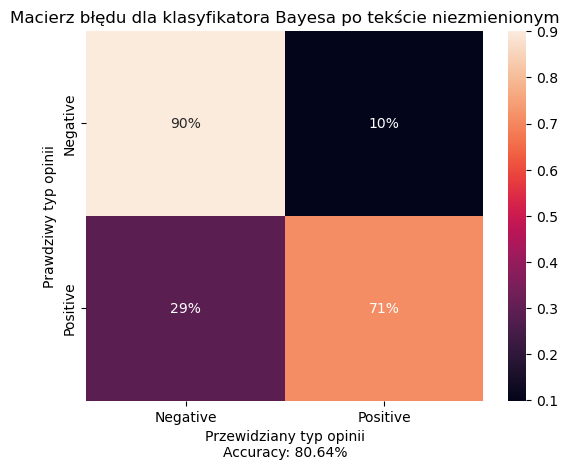

In [30]:
print("Dokładność przewidywania klasyfikatora Bayesa po tekście : ", accuracy_score(test_labels,pred_text))
print(classification_report(test_labels,pred_text))
confusion_matrix_text = confusion_matrix(test_labels, pred_text, normalize= "true")
display_nb = heatmap(confusion_matrix_text, annot=True, fmt=".0%", xticklabels=labels_types, yticklabels=labels_types)
display_nb.plot()
display_nb.set(
                title='Macierz błędu dla klasyfikatora Bayesa po tekście niezmienionym', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(test_labels,pred_text)), 
                ylabel='Prawdziwy typ opinii')
plt.show()

### Wynik
Już w przypadku analizy teksty nieprzetworzonego klasyfikator osiąga większej dokładności niż przy metodzie słownikowej - już 80%. Lekką przewagę mają opinie negatywne.

### Tekst przetworzony

Dokładność modelu na tekstach nieprzetworzonych może być pogorszona przez punktuację, słowa nie wnoszące sentymentalnego kontekstu(tak zwane stop-słowa, np. "ja", "i", "kiedy"), linki i inne. Przeanalizuję, czy usunięcie tych czynników polepszy dokładność klasyfikowania.

In [31]:
#Wygląd tekstu opinii przed przygotowaniem do analizy
print(" ".join(str(reviews[0]).split()[:50]))

Jace Rankin may be short, but he's nothing to mess with, as the man who was just hauled out of the saloon by the undertaker knows now. He's a famous bounty hunter in Oregon in the 1890s who, when he shot the man in the saloon, just finished a years


In [32]:
! pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.9 MB/s eta 0:00:00


In [33]:
from nltk.corpus import stopwords    #zawiera listę stop-słów, czyli nie wnoszących istotnych treści, np. zaimki, przyimki, liczebniki itp
import re         #biblioteka pozwala na operacje na tekscie z użyciem wyrażeń regularnych
import contractions   #pozwoli na rozwinięcię skróconych zapisów, np. "He's" stanie się "He is"
import string     #potrzebna do pobrania listy znaków interpunkcji

stop_words = stopwords.words('english')
def clean_text(text):                     #czyszczenie tekstu od dużych liter, linków, symboli, stop-słów
    clean = text.lower()      #zamiana wszystkich liter na małe
    clean = contractions.fix(clean)  #rozwinięcię skróconych zapisów
    clean = re.sub('http*','',clean)   #usunięcie linków
    punct = set(string.punctuation)    
    clean = "".join([symb for symb in clean if symb not in punct and not symb.isdigit()])  #usunięcie interpunkcji i liczb
    clean = " ".join ([word for word in clean.split() if word not in stop_words])        #usunięcie stop-słów
    return clean

In [34]:
#Zastosowanie "czyszczenia" tekstów opinii
reviews_processed = reviews
reviews_processed = list(map(clean_text,reviews_processed))

In [35]:
print(" ".join(str(reviews_processed[0]).split()[:50]))

jace rankin may short nothing mess man hauled saloon undertaker knows famous bounty hunter oregon shot man saloon finished years long quest avenge sisters murder trying figure next snottynosed farm boy rescued gang bullies offers money kill man forced ranch reluctantly agrees bring man justice kill outright first needs tell


Przeprowadzę też __lematyzację__ słów. Polega ona na sprowadzeniu danego słowa do jego formy podstawowej. Przed nią tekst rozpatruje różne formy jednego słowa jako różne słowa.

Zamiast lematyzacji może być użyty też process __stemmingu__. Odcina on od slówa końcówki, sufiksy i prefiksy, pozostawiając tylko rdzeń/bazę słowa.

Tak na przykład słowo "przemienna" w wyniku lematyzacji stanie się słowem "przemienny", a w wyniku stemmingu - "mien".

In [36]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(text):       #lematyzacja słów w tekscie
    lem = ""
    for word in text.split():
        lem = lem + lemmatizer.lemmatize(word) + " "
    return lem

In [37]:
reviews_processed = list(map(lemmatize,reviews_processed))
print(" ".join(str(reviews_processed[0]).split()[:50]))

jace rankin may short nothing mess man hauled saloon undertaker know famous bounty hunter oregon shot man saloon finished year long quest avenge sister murder trying figure next snottynosed farm boy rescued gang bully offer money kill man forced ranch reluctantly agrees bring man justice kill outright first need tell


In [38]:
#Podział danych i uczenie klasyfikatora
train_text_proces, test_text_proces, train_labels_proces, test_labels_proces = train_test_split(reviews_processed, labels_nb, train_size=0.7)
model_text_proces = NaiveBayes()
model_text_proces.fit(train_text_proces,train_labels_proces)

In [39]:
#Predykcja
pred_text_proces = model_text_proces.predict(test_text_proces)

Dokładność przewidywania klasyfikatora Bayesa po tekście przetworzonym:  0.8119444444444445
              precision    recall  f1-score   support

    negative       0.80      0.84      0.82      1823
    positive       0.83      0.78      0.80      1777

    accuracy                           0.81      3600
   macro avg       0.81      0.81      0.81      3600
weighted avg       0.81      0.81      0.81      3600



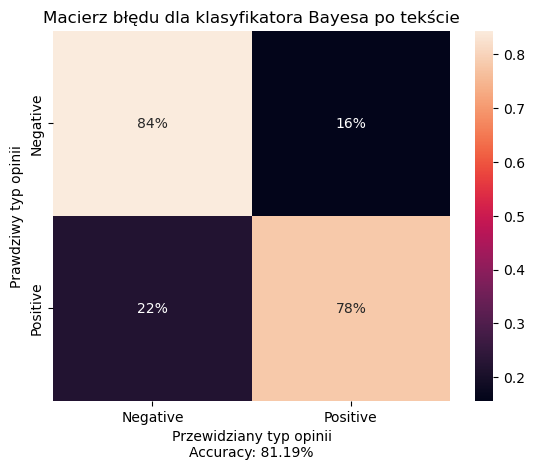

In [40]:
print("Dokładność przewidywania klasyfikatora Bayesa po tekście przetworzonym: ", accuracy_score(test_labels_proces,pred_text_proces))
print(classification_report(test_labels_proces,pred_text_proces))
confusion_matrix_nb_text_proces = confusion_matrix(test_labels_proces, pred_text_proces, normalize= "true")
display_nb = heatmap(confusion_matrix_nb_text_proces, annot=True, fmt=".0%", xticklabels=labels_types, yticklabels=labels_types)
display_nb.plot()
display_nb.set(
                title='Macierz błędu dla klasyfikatora Bayesa po tekście przetworzonym', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(test_labels_proces,pred_text_proces)), 
                ylabel='Prawdziwy typ opinii')
plt.show()

### Wynik

Po uproszczeniu tekstu dokładność wzrosła do 82%. Dobrze klasyfikowane śa jak opinie pozytywne, tak i negatywne.

### Klasyfikacja po nagłówku/podsumowaniu recenzji

### Nagłówek niezmieniony

In [41]:
#Podział danych i uczenie klasyfikatora
train_summaries, test_summaries, train_labels_sum, test_labels_sum = train_test_split(summaries, labels_nb, train_size=0.8)
model_sum = NaiveBayes()
model_sum.fit(train_summaries, train_labels_sum)

In [42]:
#Predykcja
pred_sum = model_sum.predict(test_summaries)

Dokładność przewidywania klasyfikatora Bayesa po podsumowaniu:  0.7291666666666666
              precision    recall  f1-score   support

    negative       0.75      0.69      0.72      1205
    positive       0.71      0.77      0.74      1195

    accuracy                           0.73      2400
   macro avg       0.73      0.73      0.73      2400
weighted avg       0.73      0.73      0.73      2400



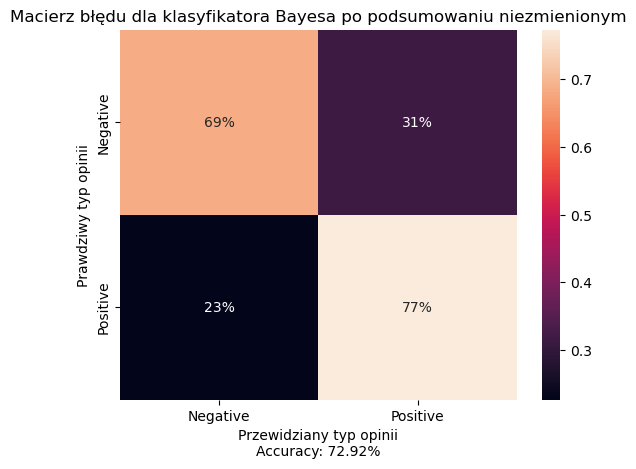

In [43]:
print("Dokładność przewidywania klasyfikatora Bayesa po podsumowaniu: ", accuracy_score(test_labels_sum,pred_sum))
print(classification_report(test_labels_sum,pred_sum))
confusion_matrix_nb_sum = confusion_matrix(test_labels_sum, pred_sum, normalize= "true")
display_nb = heatmap(confusion_matrix_nb_sum, annot=True, fmt=".0%", xticklabels=labels_types, yticklabels=labels_types)
display_nb.plot()
display_nb.set(
                title='Macierz błędu dla klasyfikatora Bayesa po podsumowaniu niezmienionym', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(test_labels_sum,pred_sum)), 
                ylabel='Prawdziwy typ opinii')
plt.show()

### Wynik
Bez czyszczenia tekstu klasyfikowanie po nagłówku opinii ma dokładność około 73% dla opinii negatywnych i pozytywnych.

### Nagłówek przetworzony

In [44]:
#Wygląd nagłówka opinii przed przygotowaniem do analizy
print(summaries[:7])

['Entertaining But Average' 'Terrific menage scenes!' 'Snapdragon Alley'
 'very light murder cozy' 'Book'
 'A story of a little girl with big dreams.'
 'This story has potential but ultimately disappoints']


In [45]:
#Zastosowanie "czyszczenia" nagłówków opinii
summaries_processed = summaries
summaries_processed = list(map(clean_text,summaries_processed))

In [46]:
print(summaries_processed[:7])

['entertaining average', 'terrific menage scenes', 'snapdragon alley', 'light murder cozy', 'book', 'story little girl big dreams', 'story potential ultimately disappoints']


In [47]:
#Lematyzacja tekstu
summaries_processed = list(map(lemmatize,summaries_processed))
print(summaries_processed[:7])

['entertaining average ', 'terrific menage scene ', 'snapdragon alley ', 'light murder cozy ', 'book ', 'story little girl big dream ', 'story potential ultimately disappoints ']


In [48]:
#Podział danych i uczenie klasyfikatora
train_summaries_proces, test_summaries_proces, train_labels_sum_proces, test_labels_sum_proces = train_test_split(summaries_processed, labels_nb, train_size=0.8)
model_sum_proces = NaiveBayes()
model_sum_proces.fit(train_summaries_proces, train_labels_sum_proces)

In [49]:
#Predykcja
pred_sum_proces = model_sum_proces.predict(test_summaries_proces)

Dokładność przewidywania klasyfikatora Bayesa po podsumowaniu:  0.75375
              precision    recall  f1-score   support

    negative       0.78      0.69      0.73      1167
    positive       0.74      0.81      0.77      1233

    accuracy                           0.75      2400
   macro avg       0.76      0.75      0.75      2400
weighted avg       0.76      0.75      0.75      2400



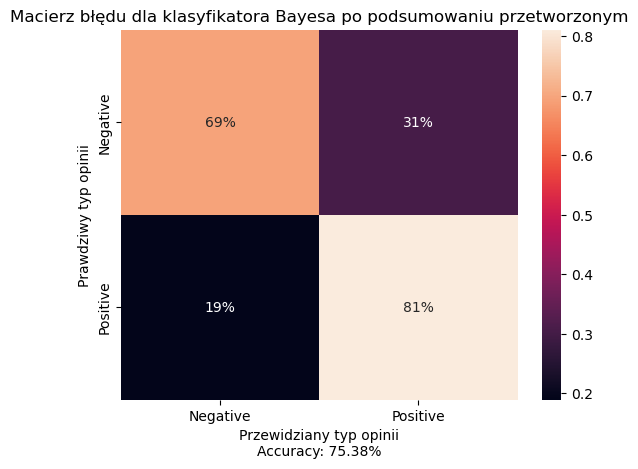

In [50]:
print("Dokładność przewidywania klasyfikatora Bayesa po podsumowaniu: ", accuracy_score(test_labels_sum_proces,pred_sum_proces))
print(classification_report(test_labels_sum_proces,pred_sum_proces))
confusion_matrix_nb_sum_proces = confusion_matrix(test_labels_sum_proces, pred_sum_proces, normalize= "true")
display_nb = heatmap(confusion_matrix_nb_sum_proces, annot=True, fmt=".0%", xticklabels=labels_types, yticklabels=labels_types)
display_nb.plot()
display_nb.set(
                title='Macierz błędu dla klasyfikatora Bayesa po podsumowaniu przetworzonym', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(test_labels_sum_proces,pred_sum_proces)),
                ylabel='Prawdziwy typ opinii')
plt.show()

### Wynik
Ogólna dokładność klasyfikowania po nagłówku zwiększyła się o 2%, ale pozytywne opinie są poprawnie klasyfikowane o 10% więcej, niż negatywne.

## Sieć neuronowa (LSTM)

Koncepcja sztucznych sieci neuronowych była oparta na sposobie przetwarzania danych poprzez rzeczywisty system nerwowy. __Rzeczywisty neuron__ składa się z$^{6}$:
* dendrytów, otrzymujących sygnał od receptorów;
* jądra, przechowującego i powielającego informację genetyczną;
* aksonu, który przewodzi sygnał wejściowy dalej;
* synaps - połączeń neuronu z innym neuronem, przekazujących sygnał wyjściowy.

Synapsy są też odpowiedzialne za podjęcie decyzji o sile przekazu sygnału, czyli o istotności otrzymanej informacji dla ciała.

__Neuron sztuczny__ lecz składa się z$^{6}$:
* wejścia, które pełni taką samą funkcję jak dendryty;
* bloku sumującego - odpowiednika jądra, przechowującego wagi;
* wyjścia, pełniącego rolę synapsy.

W odróźnieniu od neuronu biologicznego, sztuczny może posiadać tylko jedno wyjście.

Przy uczeniu sieci ma ona więc znane dane na wejściach i dane na wyjściu. Dopasowanie polega na odpowiedniej zmianie wag. Waga określa, czy dany sygnał wejściowy jest ważny. Przy prawidłowym dobraniu wag, suma iloczynów sygnałów wejściowych i ich wag, plus stała, będzie równa znanemu sygnału wyjściowemu.

Tak samo, jak synapsy, wyjście neuronu sztucznego decyduje o sile przekazu sygnału. Służy do tego blok funkcji aktywacji. Otrzymuje on wynik z bloku sumującego i na podstawie funkcji, którą przechowuję, podejmuje decyzję przekazania albo nieprzekazania sygnału dalej. 

Sieć neuronowa składa się z warstw neuronów. Pierwszą warstwą zawsze jest warstwa zewnętrzna/wejściowa. Informacje z niej są przekazywane do następnej, która nazywa się warstwą ukrytą. Warstwa ukryta po przeliczeniu może przekazać dane do następnej warstwy ukrytej albo do warstwy wyjściowej. Wynik przetwarzania warstwy wyjściowej jest wysyłany w formie decyzji.

$^{6}$_Sztuczna Inteligencja. (2020). Sztuczne sieci neuronowe. [online] [Dostęp 28.05.2023] Dostępne pod: https://www.sztucznainteligencja.org.pl/kurs/sztuczna-inteligencja-dla-poczatkujacych/sztuczne-sieci-neuronowe/_

W domyślnym podejściu do sztucznych sieci neuronowych sygnał wyjściowy jednej warstwy kieruje się na wejście następnej, czyli dane przepływają w jednym kierunku. W takim przypadku sieć traktuje wszystkie wejścia i wyjścia jako niezależne. Ale przy klasyfikowaniu danych typu tekst, audio, film zależy nam też na kolejności wystepowania słów, dźwięków, obrazów. Dla przetwarzania takich sekwencyjnych danych używa się sieci rekurencyjnych. W sieciach rekurencyjnych wyjście sieci jest znowu przekazywane na jej wejście. Takim czynem następne obliczenie jest zależne od poprzedniego.

Model LSTM, czyli Long Short Time Memory, albo Długotrwała Pamięć Krótkoterminowa, jest rodzajem rekurencyjnej sieci neuronowej. Zapamiętuje dane z większej liczby wcześniejszych kroków, niż zwykła sieć rekurencyjna. 

### Przygotowanie danych

Z racji tego, że sieć operuje tylko na danych liczbowych, potrzebne będzie przekstałcenie słów i klas na odpowiednią postać. Klasy w tej części więć są oznaczone jako __0 - ocena negatywna__ i __1 - ocena pozytywna__.

In [51]:
labels_neur = [1 if 3<label<=5 else 0 for label in labels]

__Tokenizacja__ stworzy słownik ze wszystkich słów w danym zbiorze, wraz z liczbą ich wystąpień. Funkcja __texts_to_sequences__ przepisuje zdanie, zamieniająć słowo na liczbę jego wystąpień, czyli na wyjściu otrzymuję zbiór tablic/sekwencji, reprezentujących zdania, liczb, reprezentujących słowa. Funkcja __pad_sequences__ doprowadza wszystkie sekwencje do jednej długości, domyślnie dodając do początków wartości 0. Długość sekwencji będzie równa długości najdłuższej sekwencji, ale nie większa niż __maxlen__.


In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [55]:
#Prygotowanie danych
tokenizer_text_orig = Tokenizer(num_words=10000)
tokenizer_text_orig.fit_on_texts(reviews)
vocab_size_text_orig = len(tokenizer_text_orig.word_index) + 1
sequences_text_orig = tokenizer_text_orig.texts_to_sequences(reviews)
paded_seq_text_orig = pad_sequences(sequences_text_orig, maxlen = 200)
labels_neur = np.array(labels_neur)

### Budowa modelu

Zaimplementuję model, zawierający cztery warstwy, niezbędne do działania. Model może być rozbudowany o dużo więcej warstw, ale w tym przypadku chcę zobaczyć, jak zachowa się model prosty.

Opis wszystkich warstw można znaleźć w oficjalnej dokumentacji TensorFlow pod adresem https://www.tensorflow.org/api_docs/python/tf/keras/layers .

Pierwszą warstwą jest warstwa __Osadzania(Embedding)__. Przekstałca słowa wejściowe na wektory, z którymi sieć może działać. Pierwszy parametr określa rozmiar słownictwa, liczbę tę już uzyskałam przy tokenizacji tekstów. Drugi parametr wyznacza wielkość przestrzeni wektorowej, może być równy 32, 100 albo więcej. Wybieram wartość 32 aby nie obciążać procesu. Trzeci parametr, "input_length", oznacza długość sekwencji wyjściowych. Wartość tą już określiłam przy zastosowaniu pad_sequences.

Drugą warstwę stanowi __SpatialDropout1D__. Warstwa Dropout pojawia się prawie we wszystkich modelach sieci neuronowych. Poprzez odrzucanie niektórych losowo wybranych elementów, przeciwdziała zbyt dużemu dopasowaniu modelu, tzn. przypadków, gdy model zapamiętał wszystkie dane uczące dokładnie jak były i tylko je może teraz rozpoznać. W odróźnieniu od standardowej warstwy Dropout, SpatialDropout1D nie traktuje każde oddzielne słowo jako niezależny element, tylko każde zdanie. W rezultacie nie otrzymam losowych czyszczeń słów w całej bazie, tylko w przedziałach zdań. Na przykład, jeżeli mam zbiór [[1,2,3],[3,2,1],[1,3,2]], to po Dropout mogłabym otrzymać [[1,0,3],[0,2,0][1,3,2]], a po SpatialDropout1D [[1,0,3],[3,0,1],[1,0,2]]. Parametr warstwy wskazuje ułamek danych, który musi być opuszczony, w tym przypadku 0.3 albo 30%.

Trzecią warstwą jest własnie __LSTM__. Pierwszy parametr określa wymiary wyjściowej przestrzeni, w tym przypadku wybrałam 100, aby nie obciążać zbytnio jego działania. Parametr "Dropout" znowu opuści losowe elementy na wejściu/wyjściu, "Recurrent_dropout" odrzuci niektóre stany z neuronów rekurencyjnych.

Ostatnia warstwa __Gęsta(Dense)__. Pierwszym parametrem znowu jest wymiar przestrzeni wyjściowej, wymiar 1 oznacza, że warstwa na podstawie danych wejściowych określi już klasę obiektu. Funkcja aktywacji służy do obliczania tej wartości wyjściowej. W tym przypadku jest to __funkcja sygmoidalna__.

![Funkcje aktywacji](https://www.researchgate.net/profile/Aaron-Stebner-2/publication/341310767/figure/fig7/AS:890211844255749@1589254451431/Common-activation-functions-in-artificial-neural-networks-NNs-that-introduce.ppm)

_Źródło obrazu: 
Johnson N., Vulimiri P., To A., Zhang X., Brice C.,Kappes Branden,Stebner Aaron (2020). Machine Learning for Materials Developments in Metals Additive Manufacturing._

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, SpatialDropout1D, Embedding

In [57]:
#Tworzenie i kompilacja
model_text_orig = Sequential([
    Embedding(vocab_size_text_orig, 32, input_length=200) ,
    SpatialDropout1D(0.3),
    LSTM(100, dropout=0.5, recurrent_dropout=0.5),
    Dense(1, activation='sigmoid')
])
model_text_orig.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 
model_text_orig.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1057824   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,111,125
Trainable params: 1,111,125
Non-trainable params: 0
_________________________________________________________________


In [58]:
#Dopasowanie
history_text_orig = model_text_orig.fit(paded_seq_text_orig,labels_neur,validation_split=0.2,epochs=10,batch_size=32)

Epoch 1/10
300/300 [==============================] - 60s 190ms/step - loss: 0.5625 - accuracy: 0.7030 - val_loss: 0.4082 - val_accuracy: 0.8225
Epoch 2/10
300/300 [==============================] - 57s 190ms/step - loss: 0.4027 - accuracy: 0.8250 - val_loss: 0.4053 - val_accuracy: 0.8221
Epoch 3/10
300/300 [==============================] - 57s 190ms/step - loss: 0.3301 - accuracy: 0.8640 - val_loss: 0.3811 - val_accuracy: 0.8413
Epoch 4/10
300/300 [==============================] - 57s 190ms/step - loss: 0.2839 - accuracy: 0.8876 - val_loss: 0.3975 - val_accuracy: 0.8329
Epoch 5/10
300/300 [==============================] - 57s 191ms/step - loss: 0.2477 - accuracy: 0.9021 - val_loss: 0.4402 - val_accuracy: 0.8321
Epoch 6/10
300/300 [==============================] - 56s 188ms/step - loss: 0.2164 - accuracy: 0.9173 - val_loss: 0.4311 - val_accuracy: 0.8371
Epoch 7/10
300/300 [==============================] - 57s 190ms/step - loss: 0.1998 - accuracy: 0.9218 - val_loss: 0.4315 - val_ac

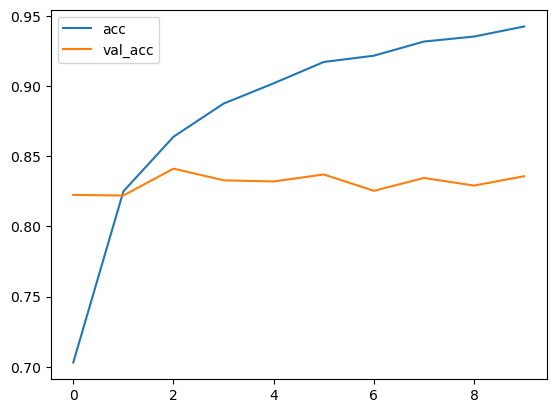

In [59]:
plt.plot(history_text_orig.history['accuracy'], label='acc')
plt.plot(history_text_orig.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

### Wynik

Dokładność przewidywania danych walidacyjnych może byc przyjęta jako dokładność przewidywania modelu. W tym przypadku pod koniec uczenia osiągała ona 83%.

### Przetworzony tekst

In [60]:
#Prygotowanie danych
tokenizer_text_proces = Tokenizer(num_words=10000)
tokenizer_text_proces.fit_on_texts(reviews_processed)
vocab_size_text_proces = len(tokenizer_text_proces.word_index) + 1
sequences_text_proces = tokenizer_text_proces.texts_to_sequences(reviews_processed)
paded_seq_text_proces = pad_sequences(sequences_text_proces, maxlen = 200)

W tej szczególnej części oddziele od zbioru dane testowe, którego model nie będzie widział przy uczeniu się. Na podstawie przewidywania dla tych danych stworzę też macierz błędu.

In [61]:
paded_seq_text_proces_train, paded_seq_text_proces_test, labels_neur_train, labels_neur_test = train_test_split(paded_seq_text_proces,labels_neur,train_size=0.8)

In [62]:
#Tworzenie i kompilacja
model_text_proces = Sequential([
    Embedding(vocab_size_text_proces, 32, input_length=200) ,
    SpatialDropout1D(0.3),
    LSTM(100, dropout=0.5, recurrent_dropout=0.5),
    Dense(1, activation='sigmoid')
])
model_text_proces.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 
model_text_proces.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           1309120   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,362,421
Trainable params: 1,362,421
Non-trainable params: 0
_________________________________________________________________


In [63]:
#Dopasowanie
history_text_proces = model_text_proces.fit(paded_seq_text_proces_train,labels_neur_train,validation_split=0.2,epochs=10,batch_size=32)

Epoch 1/10
240/240 [==============================] - 48s 190ms/step - loss: 0.5908 - accuracy: 0.6698 - val_loss: 0.4577 - val_accuracy: 0.7932
Epoch 2/10
240/240 [==============================] - 46s 191ms/step - loss: 0.3975 - accuracy: 0.8236 - val_loss: 0.4186 - val_accuracy: 0.8146
Epoch 3/10
240/240 [==============================] - 45s 189ms/step - loss: 0.3123 - accuracy: 0.8749 - val_loss: 0.4401 - val_accuracy: 0.8130
Epoch 4/10
240/240 [==============================] - 46s 190ms/step - loss: 0.2624 - accuracy: 0.8962 - val_loss: 0.5001 - val_accuracy: 0.8010
Epoch 5/10
240/240 [==============================] - 46s 193ms/step - loss: 0.2233 - accuracy: 0.9117 - val_loss: 0.5091 - val_accuracy: 0.8083
Epoch 6/10
240/240 [==============================] - 45s 189ms/step - loss: 0.1944 - accuracy: 0.9249 - val_loss: 0.5122 - val_accuracy: 0.8094
Epoch 7/10
240/240 [==============================] - 46s 190ms/step - loss: 0.1677 - accuracy: 0.9366 - val_loss: 0.6333 - val_ac

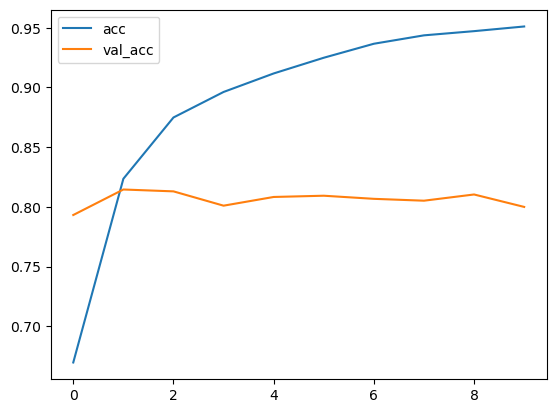

In [64]:
plt.plot(history_text_proces.history['accuracy'], label='acc')
plt.plot(history_text_proces.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [95]:
#Przewidywanie
predict_neur = model_text_proces.predict(paded_seq_text_proces_test)

75/75 [==============================] - 3s 35ms/step


In [96]:
#Interpretacja wyników
predict_neur.flatten()
predict_neur = np.where(predict_neur > 0.5, 1, 0)

Dokładność przewidywania sieci neuronowej:  0.7970833333333334
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1201
           1       0.80      0.80      0.80      1199

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400



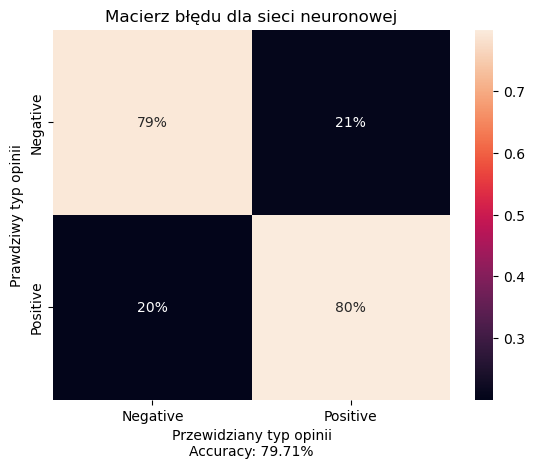

In [97]:
print("Dokładność przewidywania sieci neuronowej: ", accuracy_score(labels_neur_test,predict_neur))
print(classification_report(labels_neur_test,predict_neur))
confusion_matrix_nb_sum_proces = confusion_matrix(labels_neur_test,predict_neur, normalize= "true")
display_nb = heatmap(confusion_matrix_nb_sum_proces, annot=True, fmt=".0%", xticklabels=labels_types, yticklabels=labels_types)
display_nb.plot()
display_nb.set(
                title='Macierz błędu dla sieci neuronowej', 
                xlabel='Przewidziany typ opinii\nAccuracy: {:.2%}'.format(accuracy_score(labels_neur_test,predict_neur)),
                ylabel='Prawdziwy typ opinii')
plt.show()

### Wynik
Na ostatnich epokach dokładność dla danych walidacyjnych wynosiła 80%. Dokładność przewidywania klasy dla danych testowych jest równa 79,7%. Zarówno opinie negatywne jak i pozytywne są prawidłowo klasyfikowane w około 80%.

### Nagłówki nieprzetworzone

In [85]:
#Prygotowanie danych
tokenizer_sum_orig = Tokenizer(num_words=10000)
tokenizer_sum_orig.fit_on_texts(summaries)
vocab_size_sum_orig = len(tokenizer_text_orig.word_index) + 1
sequences_sum_orig = tokenizer_text_orig.texts_to_sequences(summaries)
paded_seq_sum_orig = pad_sequences(sequences_text_orig, maxlen = 200)

In [86]:
#Tworzenie i kompilacja
model_sum_orig = Sequential([
    Embedding(vocab_size_sum_orig, 32, input_length=200) ,
    SpatialDropout1D(0.3),
    LSTM(100, dropout=0.5, recurrent_dropout=0.5),
    Dense(1, activation='sigmoid')
])
model_sum_orig.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 
model_sum_orig.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           1057824   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,111,125
Trainable params: 1,111,125
Non-trainable params: 0
_________________________________________________________________


In [87]:
#Dopasowanie
history_sum_orig = model_sum_orig.fit(paded_seq_sum_orig,labels_neur,validation_split=0.2,epochs=10,batch_size=32)

Epoch 1/10
300/300 [==============================] - 60s 193ms/step - loss: 0.5645 - accuracy: 0.6979 - val_loss: 0.4335 - val_accuracy: 0.8054
Epoch 2/10
300/300 [==============================] - 57s 192ms/step - loss: 0.3886 - accuracy: 0.8331 - val_loss: 0.3696 - val_accuracy: 0.8421
Epoch 3/10
300/300 [==============================] - 56s 188ms/step - loss: 0.3314 - accuracy: 0.8635 - val_loss: 0.3811 - val_accuracy: 0.8375
Epoch 4/10
300/300 [==============================] - 56s 187ms/step - loss: 0.2885 - accuracy: 0.8834 - val_loss: 0.4021 - val_accuracy: 0.8425
Epoch 5/10
300/300 [==============================] - 56s 188ms/step - loss: 0.2517 - accuracy: 0.8983 - val_loss: 0.3892 - val_accuracy: 0.8417
Epoch 6/10
300/300 [==============================] - 57s 190ms/step - loss: 0.2300 - accuracy: 0.9096 - val_loss: 0.4369 - val_accuracy: 0.8313
Epoch 7/10
300/300 [==============================] - 57s 191ms/step - loss: 0.2040 - accuracy: 0.9195 - val_loss: 0.4200 - val_ac

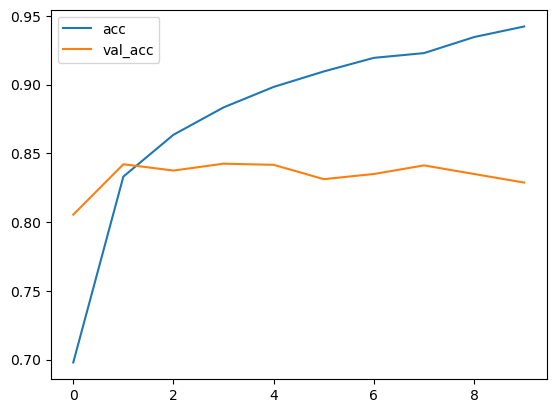

In [88]:
plt.plot(history_sum_orig.history['accuracy'], label='acc')
plt.plot(history_sum_orig.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

### Wynik

Dokładność modelu na danych walidacyjnych jest na poziomie 83%.

### Nagłówki przetworzone

In [89]:
#Prygotowanie danych
tokenizer_sum_proces = Tokenizer(num_words=10000)
tokenizer_sum_proces.fit_on_texts(summaries_processed)
vocab_size_sum_proces = len(tokenizer_text_orig.word_index) + 1
sequences_sum_proces = tokenizer_text_orig.texts_to_sequences(summaries_processed)
paded_seq_sum_proces = pad_sequences(sequences_text_orig, maxlen = 200)

In [90]:
#Tworzenie i kompilacja
model_sum_proces = Sequential([
    Embedding(vocab_size_sum_proces, 32, input_length=200) ,
    SpatialDropout1D(0.3),
    LSTM(100, dropout=0.5, recurrent_dropout=0.5),
    Dense(1, activation='sigmoid')
])
model_sum_proces.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 
model_sum_proces.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 32)           1057824   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 100)               53200     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,111,125
Trainable params: 1,111,125
Non-trainable params: 0
_________________________________________________________________


In [91]:
#Dopasowanie
history_sum_proces = model_sum_proces.fit(paded_seq_sum_proces,labels_neur,validation_split=0.2,epochs=10,batch_size=32)

Epoch 1/10
300/300 [==============================] - 61s 196ms/step - loss: 0.5569 - accuracy: 0.7183 - val_loss: 0.4849 - val_accuracy: 0.7837
Epoch 2/10
300/300 [==============================] - 57s 192ms/step - loss: 0.3982 - accuracy: 0.8276 - val_loss: 0.3772 - val_accuracy: 0.8396
Epoch 3/10
300/300 [==============================] - 56s 188ms/step - loss: 0.3292 - accuracy: 0.8633 - val_loss: 0.4014 - val_accuracy: 0.8221
Epoch 4/10
300/300 [==============================] - 57s 189ms/step - loss: 0.2806 - accuracy: 0.8870 - val_loss: 0.3886 - val_accuracy: 0.8375
Epoch 5/10
300/300 [==============================] - 57s 188ms/step - loss: 0.2583 - accuracy: 0.8989 - val_loss: 0.3990 - val_accuracy: 0.8225
Epoch 6/10
300/300 [==============================] - 57s 189ms/step - loss: 0.2419 - accuracy: 0.9019 - val_loss: 0.4331 - val_accuracy: 0.8313
Epoch 7/10
300/300 [==============================] - 56s 187ms/step - loss: 0.2005 - accuracy: 0.9205 - val_loss: 0.4413 - val_ac

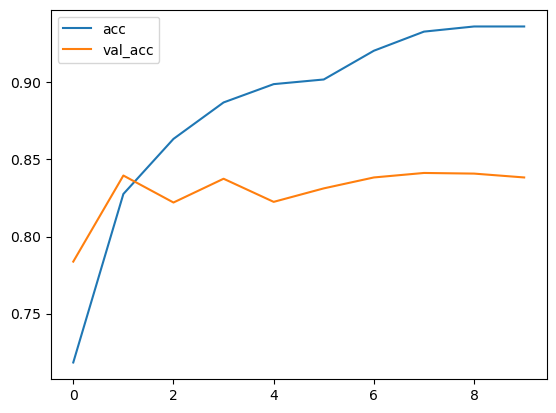

In [92]:
plt.plot(history_sum_proces.history['accuracy'], label='acc')
plt.plot(history_sum_proces.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

### Wynik
W czterech ostatnich epokach dokładność walidacji modelu znajdowała się w okolicy poziomu 84%.

## Podsumowanie

### Klasyfikowanie po tekście opinii

Największą dokładność klasyfikowania - 83% - wykazała sieć neuronowa, działająca na tekście nieprzetworzonym. Dokładność w 81% osiągnął klasyfikator Bayesa przy analizie danych przetworzonych. Zarówno sieć neuronowa przy danych przetworzonych, jak i klasyfikator Bayesa przy danych oryginalnych pokazali dokładność w 80%. Przy klasyfikowaniu za pomocą tych dwóch metod nie ma wyczuwalnej różnicy pomiędzy dokładnościami klasyfikowania różnych klas.

W przypadku VADERa, najlepszy wynik należy do analizy tekstów po usunięciu opinii neutralnych - w zakresie 70-75%. Bez usunięcia dokładność wynosiła nie więcej niż 65%. W dużej liczbie przypadków opinie pozytywne mieli przewagę dokładności. Zwiększenie dokładności klasyfikowania opinii negatywnych udało się osiągnąć tylko po istotnym zwiększeniu progu przypisania klasy pozytywnej.

### Klasyfikowanie po podsumowaniu opinii
Największą dokładność widać przy użyciu sieci neuronowej na danych przetworzonych - 84%. Działanie na danych oryginalnych zmniejszyło ją tylko o 1%. Klasyfikator Bayesa poprawnie klasyfikował 75% danych przy wstępnym przetwarzaniu, 73% bez niego. W przypadku modelu VADER dokładność wyniosła 70% przy usunięciu danych o ocenie neutralnej. Bez usunięcia wartość zawierała się w okolicach 60% przy podziale na dwie klasy i 45% przy podziale na trzy.

__Ostatecznie__ najlepszym sposobem na klasyfikowanie opinii są metody statystyczne. Metoda uczenia sieci neuronowej jest średnio złożona w implementacji, ale wymaga stosunkowo dużo czasu na uczenie się. Naiwny klasyfikator Bayesa jest szybszy i przy imporcie już zaimplementowanej metody, np. z NLTK, nie jest implementacyjnie trudny. Różnica dokładności jest względnie mała.